In [1]:
import sys
"""Put the path to the eco-tools folder in the following line... should look something like this one below"""
sys.path.append("/Users/victoriasalova/Documents/ECO/eco-tools/") #path to PI CLient


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from ecotools.pi_client import pi_client

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
pc = pi_client(root='readonly')

## Searching for tags
Just type in what you need to search for and save it into `points` variable

In [2]:
points = pc.search_by_point("GBSF_Electricity_Demand_kBtu")

points


NameError: name 'pc' is not defined

## Load Parameters for Pi Client

- **Date Format**: `"YYY-MM-DD"` or can use the `'*'` (wildcard) for `end` date to get today
- **Interval**: Can be in days, hours, minutes, seconds such as `'1d'`, `'1h'`, `'1m'`, or `'1s'`
- **Calculation**: 

    - `'summary'`  - This will take the **average** of all `recorded` values that exist within in time interval. If no     values exists, `NaN` will be returned.

    - `'calculated'` – Same functionality as above, except the recorded data is transferred to the local client and pandas does the **resampling and averaging**. Performance may vary between the two functions depending on the data, and size.

    - `'recorded'` – raw data and **raw time stamps**. If pulling multiple columns, the index will grow for all columns to accommodate each individual timestamp and nan values will be filled in for the mismatches.

    - `'interpolated'`:This performs a **linear interpolation** to estimate the value of the point at that time based on surrounding `recorded` (raw data) points. For time stamps before the first recorded value, the function returns either `DataFrame` created or **No Data**. For time stamps between two recorded values, the function  determines the value at the time stamp using linear interpolation between the recorded values. For points that store discrete values, such as digital state points or step points, the function returns the last recorded value that precedes the time stamp. For time stamps after the last recorded value, the returned value depends on the point type: For historical PI points, the function returns the most recent value. For future PI points, the function returns *No Data*.




In [5]:
start = "2018-02-01" 
end = "*"
interval = '1h' #can be 1d 2d for days or 1s for seconds or 1m for minutes
calculation = 'summary'


## Download points you are interested in

In [6]:
df = pc.get_stream_by_point(points,  start = start, 
                            end = end,calculation=calculation,
                            interval=interval)
df.shape

Grabbing WebIDs ...
WebID collection complete!
15:45:35: Sending API request... Chunk 1 of 1
15:45:37: Response recieved for 1 tags! (1.82)


(12829, 1)

In [7]:
df.head()

,GBSF_Electricity_Demand_kBtu
Timestamp,
2018-02-01 00:00:00,2567.533494
2018-02-01 01:00:00,2571.118335
2018-02-01 02:00:00,2527.213831
2018-02-01 03:00:00,2511.278558
2018-02-01 04:00:00,2506.536407


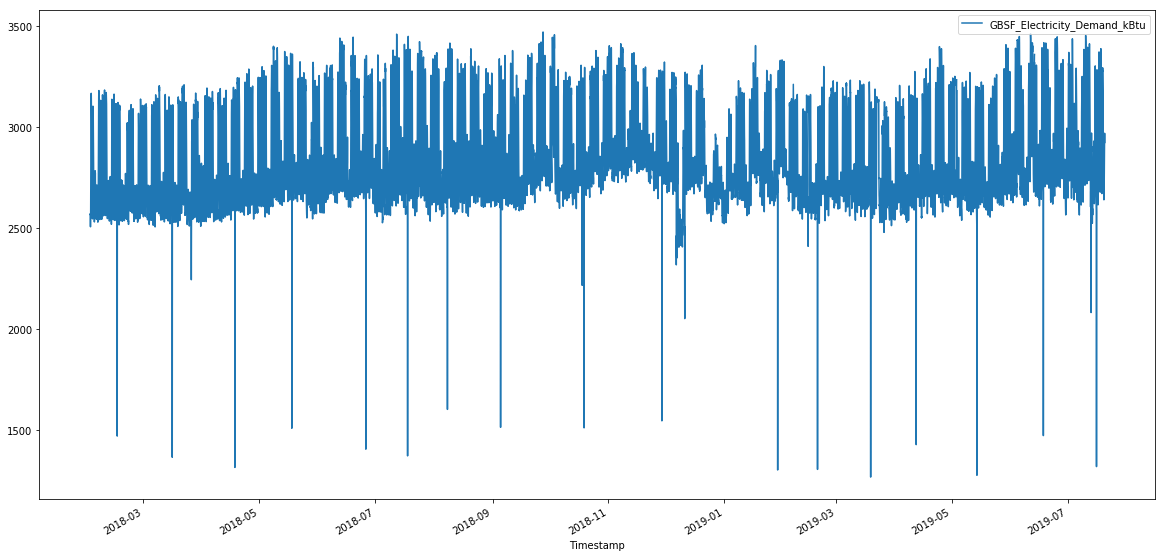

In [8]:
df.plot(figsize = (20,10))

## Saving Data into a csv

In [10]:
df.to_csv("GBSF_Electricity_Demand_kBtu.csv")